<h1 style="color:blue"> Drug Classification Machine Learning </h1>

In [16]:
# libraries imported
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [6]:
# reading csv
drugs = pd.read_csv('./drug200.csv')
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


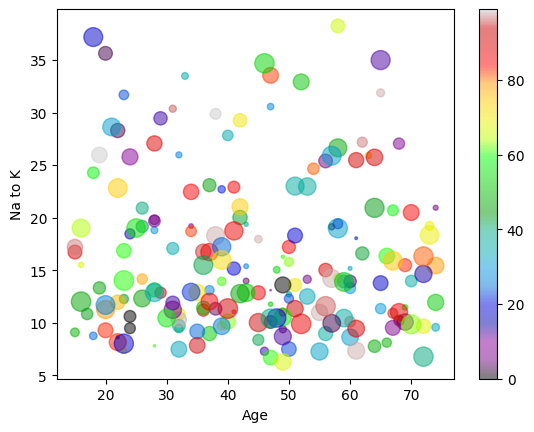

In [25]:
# Data Visualization

colors = np.random.randint(100, size=(200))
plt.scatter(drugs['Age'], drugs['Na_to_K'], s = np.array([i for i in range(200)]), alpha = 0.5, c = colors, cmap='nipy_spectral')
plt.xlabel("Age")
plt.ylabel("Na to K")

plt.colorbar()
plt.show()

In [29]:
drugs.isna().sum() # no nan values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [30]:
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [31]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# Preprocessing

